In [ ]:
"""Neural Networks are often used to classify data. Examples are neural networks:

take in photos and classify subjects in the photos as {dog,cat,horse,other}
take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}
A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, 
the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of 
the input being in each category.

In this lab you will see an example of building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.

Let's start by creating a four-class data set."""

"Neural Networks are often used to classify data. Examples are neural networks:\n\ntake in photos and classify subjects in the photos as {dog,cat,horse,other}\ntake in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}\nA network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, \nthe output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of \nthe input being in each category.\n\nIn this lab you will see an example of building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.\n\nLet's start by creating a four-class data set."

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#We will use Scikit-Learn make_blobs function to make a training data set with 4 categories as shown in the plot below.

In [ ]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

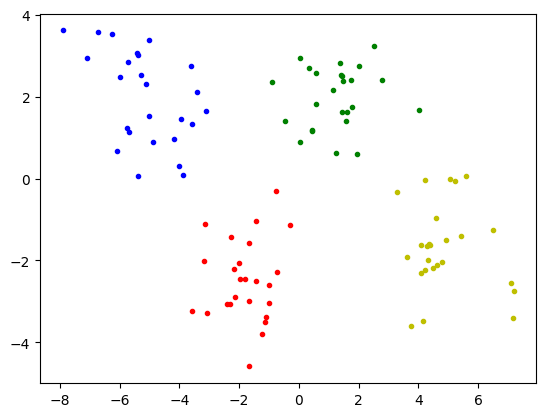

In [ ]:
class0=y_train==0
class1=y_train==1
class2=y_train==2
class3=y_train==3
X0=X_train[class0]
X1=X_train[class1]
X2=X_train[class2]
X3=X_train[class3]
plt.plot(X0[:,0],X0[:,1],'b.')
plt.plot(X1[:,0],X1[:,1],'r.')
plt.plot(X2[:,0],X2[:,1],'g.')
plt.plot(X3[:,0],X3[:,1],'y.')

In [ ]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [ ]:
"""This lab will use a 2-layer network as shown. Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, 
the output with the highest value is the predicted class of the input.
Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a linear rather than a softmax activation. While it is possible to 
include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to 
predict probabilities, 
the softmax can be applied at that point."""

'This lab will use a 2-layer network as shown. Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, \nthe output with the highest value is the predicted class of the input.\nBelow is an example of how to construct this network in Tensorflow. Notice the output layer uses a linear rather than a softmax activation. While it is possible to \ninclude the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to \npredict probabilities, \nthe softmax can be applied at that point.'

In [ ]:
model=Sequential([Dense(units=2,activation='relu',name='l1'),
                  Dense(units=4,activation='linear',name='l2')
                  ]
                 )

In [ ]:
#The statements below compile and train the network. Setting from_logits=True as an argument to the loss function specifies that the
# output activation was linear rather than a softmax.

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.01)
              )

model.fit(X_train,y_train,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 2.7434
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 2.4894
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 2.2440
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 2.0304
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 1.8182
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 1.6529
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 1.4890
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3514
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2407
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1553
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0845
Epoch 12/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0232
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

In [ ]:
"""Above, the decision boundaries show how the model has partitioned the input space. This very simple model has had no trouble classifying the training data.
 How did it accomplish this? Let's look at the network in more detail.

Below, we will pull the trained weights from the model and use that to plot the function of each of the network units. Further down, there is a more detailed
 explanation of the results. You don't need to know these details to successfully use neural networks, but it may be helpful to gain more intuition about how
  the layers combine to solve a classification problem."""

"Above, the decision boundaries show how the model has partitioned the input space. This very simple model has had no trouble classifying the training data.\n How did it accomplish this? Let's look at the network in more detail.\n\nBelow, we will pull the trained weights from the model and use that to plot the function of each of the network units. Further down, there is a more detailed\n explanation of the results. You don't need to know these details to successfully use neural networks, but it may be helpful to gain more intuition about how\n  the layers combine to solve a classification problem."

In [ ]:
# gather the trained parameters from the first layer
l1 = model.get_layer("l1")
W1,b1 = l1.get_weights()

In [ ]:
print(W1)
print(b1)

[[-1.3093162  -0.48564866]
 [-0.90949476  1.5747236 ]]
[1.3422929  0.91791946]


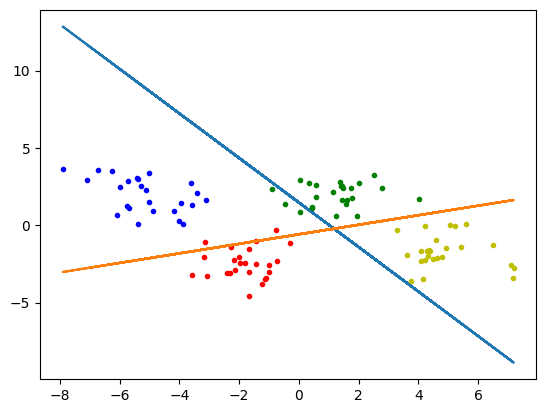

In [ ]:
m=-(W1[0,0]/W1[1,0])
c=-(b1[0]/W1[1,0])
y_pred=m*X_train[:,0]+c
plt.plot(X_train[:,0],y_pred)
class0=y_train==0
class1=y_train==1
class2=y_train==2
class3=y_train==3
X0=X_train[class0]
X1=X_train[class1]
X2=X_train[class2]
X3=X_train[class3]
plt.plot(X0[:,0],X0[:,1],'b.')
plt.plot(X1[:,0],X1[:,1],'r.')
plt.plot(X2[:,0],X2[:,1],'g.')
plt.plot(X3[:,0],X3[:,1],'y.')


m=-(W1[0,1]/W1[1,1])
c=-(b1[1]/W1[1,1])
y_pred=m*X_train[:,0]+c
plt.plot(X_train[:,0],y_pred)

In [ ]:
# gather the trained parameters from the output layer
l2 = model.get_layer("l2")
W2, b2 = l2.get_weights()

In [ ]:
print(W2)
print(b2)

[[ 0.3672287  1.0914418 -1.5048088 -2.6701274]
 [ 1.0954173 -1.6069894  1.2446816 -1.8149108]]
[-2.5909214 -1.4777112  0.7341688  2.8219652]


In [ ]:
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

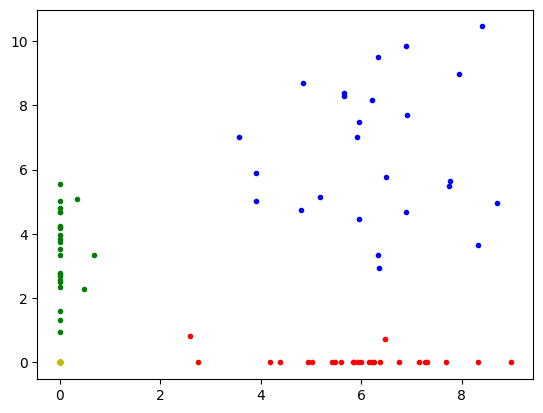

In [ ]:
# here i dont know what i did but try to see the decision boundaries made by ANN
#for i in range(4):
 # m=-(W2[0,i]/W2[1,i])
  #c=-(b2[i]/W2[1,i])
 # y_pred=m*Xl2[:,0]+c
 # plt.plot(Xl2[:,0],y_pred)  we cannot plot lines here for seperatinf beacue thiss is output layer
class0=y_train==0
class1=y_train==1
class2=y_train==2
class3=y_train==3
X0=Xl2[class0]
X1=Xl2[class1]
X2=Xl2[class2]
X3=Xl2[class3]
plt.plot(X0[:,0],X0[:,1],'b.')
plt.plot(X1[:,0],X1[:,1],'r.')
plt.plot(X2[:,0],X2[:,1],'g.')
plt.plot(X3[:,0],X3[:,1],'y.')

In [ ]:
"""Layer 1 
These plots show the function of Units 0 and 1 in the first layer of the network. The inputs are ( 𝑥0,𝑥1
 ) on the axis. The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph. 
 Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks.
  The contour lines in this graph show the transition point between the output,  𝑎[1]𝑗
  being zero and non-zero. Recall the graph for a ReLu : The contour line in the graph is the inflection point in the ReLu.

Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will 
output a value greater than zero.
Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value
 greater than zero. Let's see how this works out in the next layer!"""

"Layer 1 \nThese plots show the function of Units 0 and 1 in the first layer of the network. The inputs are ( 𝑥0,𝑥1\n ) on the axis. The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph. \n Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks.\n  The contour lines in this graph show the transition point between the output,  𝑎[1]𝑗\n  being zero and non-zero. Recall the graph for a ReLu : The contour line in the graph is the inflection point in the ReLu.\n\nUnit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will \noutput a value greater than zero.\nUnit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value\n greater

In [ ]:
"""Layer 2, the output layer 
The dots in these graphs are the training examples translated by the first layer. One way to think of this is the first layer has created a new set of features for
 evaluation by the 2nd layer. The axes in these plots are the outputs of the previous layer  𝑎[1]0
  and  𝑎[1]1
 . As predicted above, classes 0 and 1 (blue and green) have  𝑎[1]0=0
  while classes 0 and 2 (blue and orange) have  𝑎[1]1=0
 .
Once again, the intensity of the background color indicates the highest values.
Unit 0 will produce its maximum value for values near (0,0), where class 0 (blue) has been mapped.
Unit 1 produces its highest values in the upper left corner selecting class 1 (green).
Unit 2 targets the lower right corner where class 2 (orange) resides.
Unit 3 produces its highest values in the upper right selecting our final class (purple).

One other aspect that is not obvious from the graphs is that the values have been coordinated between the units. It is not sufficient for a unit to
 produce a maximum value for the class it is selecting for, it must also be the highest value of all the units for points in that class. This is done 
 by the implied softmax function that is part of the loss function (SparseCategoricalCrossEntropy). Unlike other activation functions, the softmax works across all the outputs.

You can successfully use neural networks without knowing the details of what each unit is up to. Hopefully, this example has provided some intuition 
about what is happening under the hood."""

'Layer 2, the output layer \nThe dots in these graphs are the training examples translated by the first layer. One way to think of this is the first layer has created a new set of features for\n evaluation by the 2nd layer. The axes in these plots are the outputs of the previous layer  𝑎[1]0\n  and  𝑎[1]1\n . As predicted above, classes 0 and 1 (blue and green) have  𝑎[1]0=0\n  while classes 0 and 2 (blue and orange) have  𝑎[1]1=0\n .\nOnce again, the intensity of the background color indicates the highest values.\nUnit 0 will produce its maximum value for values near (0,0), where class 0 (blue) has been mapped.\nUnit 1 produces its highest values in the upper left corner selecting class 1 (green).\nUnit 2 targets the lower right corner where class 2 (orange) resides.\nUnit 3 produces its highest values in the upper right selecting our final class (purple).\n\nOne other aspect that is not obvious from the graphs is that the values have been coordinated between the units. It is not suff